This project demonstrates how to build a loan prediction application using the PyScript framework. The application utilizes a machine learning model to predict whether a loan applicant will be approved or rejected.


In [1]:
import pandas as pd
import numpy as np

In [2]:
loan = pd.read_csv("/content/drive/MyDrive/train_u6lujuX_CVtuZ9i.csv")
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
loan_bk = loan.copy()

In [4]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#drop col of loan_id as it is no of use
loan = loan.drop(columns=["Loan_ID"])

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [8]:
loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
categorical_data = [i for i in loan.columns
                    if loan[i].dtype == "object"]
categorical_data

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [10]:
numerical_data = [i for i in loan.columns
                    if loan[i].dtype != "object"]
numerical_data

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [11]:
discrete_num_data = [i for i in numerical_data
                     if len(loan[i].unique()) < 16]
discrete_num_data

['Loan_Amount_Term', 'Credit_History']

In [12]:
continuous_num_data = [i for i in numerical_data
                     if len(loan[i].unique()) >= 16]
continuous_num_data

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

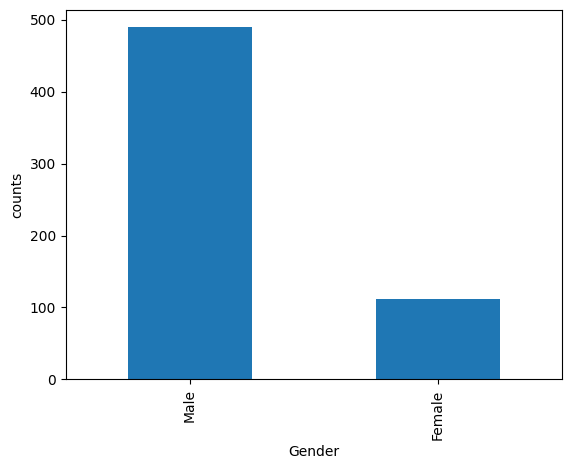

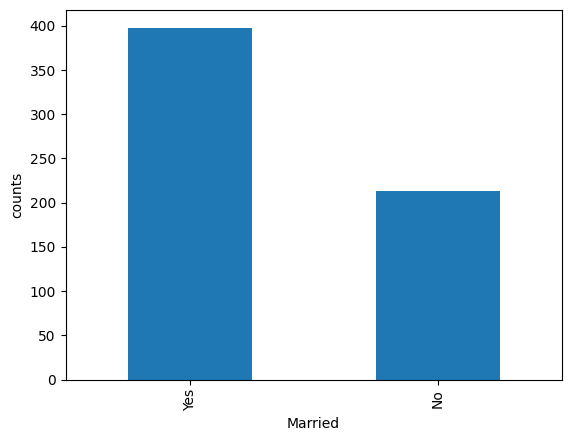

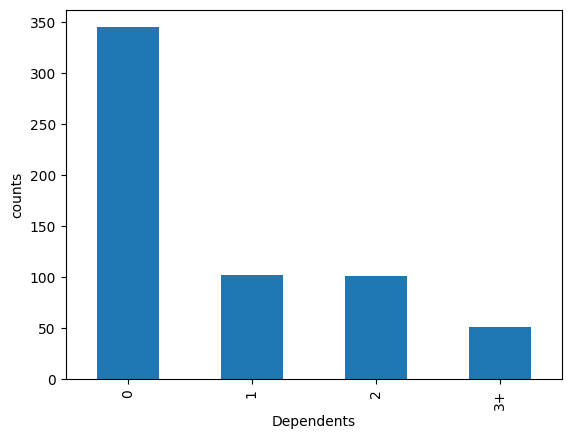

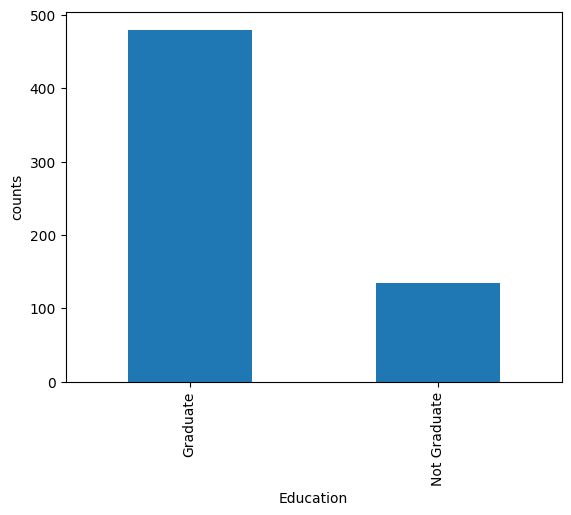

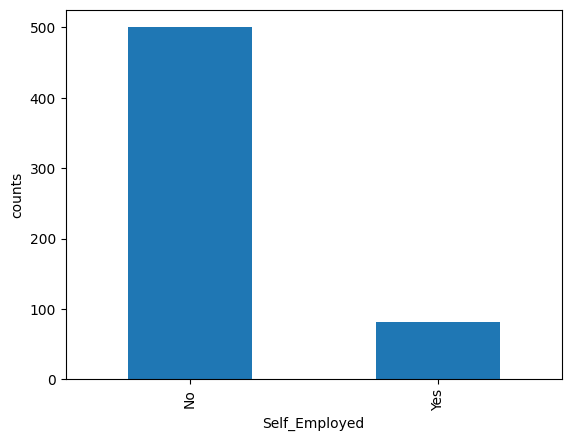

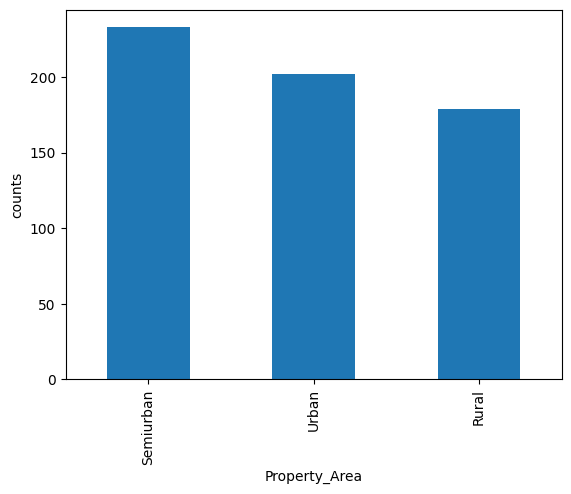

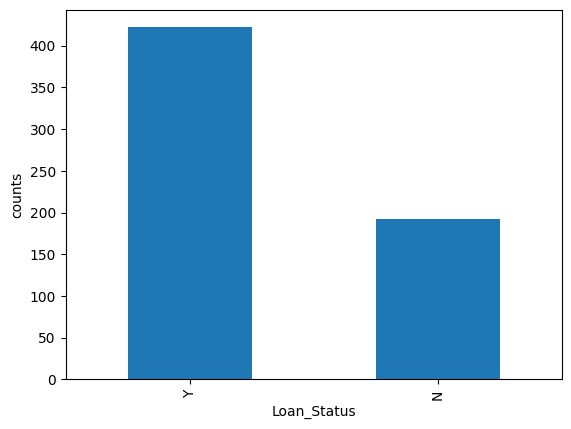

In [13]:
import matplotlib.pyplot as plt



for i in categorical_data:
  loan[i].value_counts().plot(kind="bar")
  plt.xlabel(i)
  plt.ylabel("counts")
  plt.show()

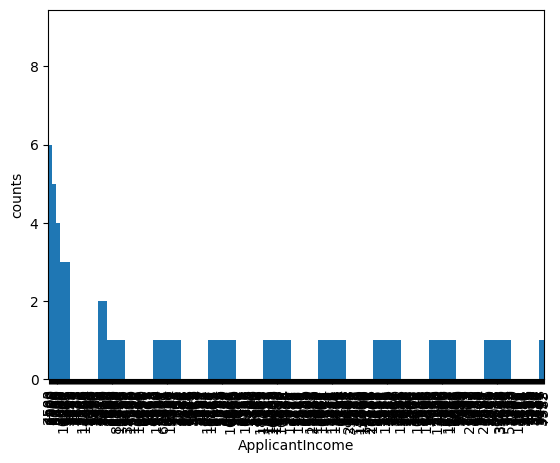

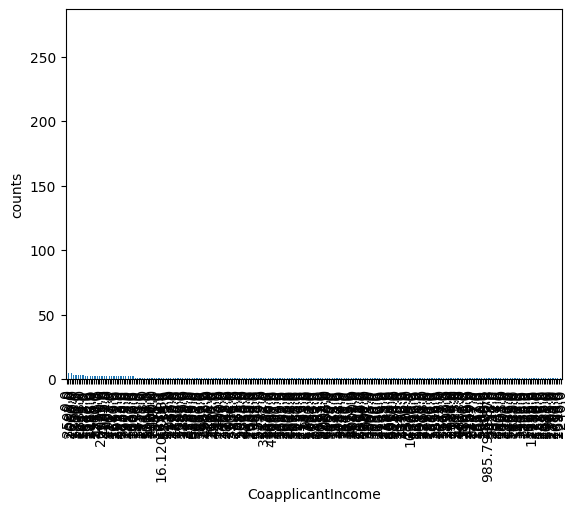

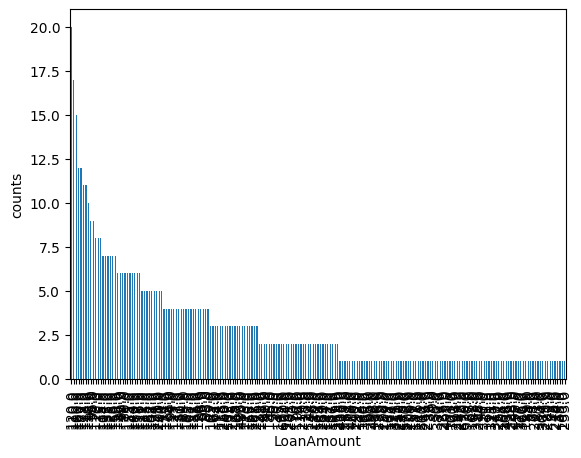

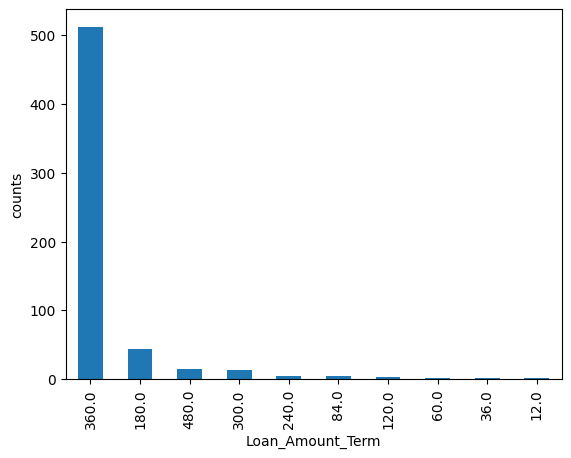

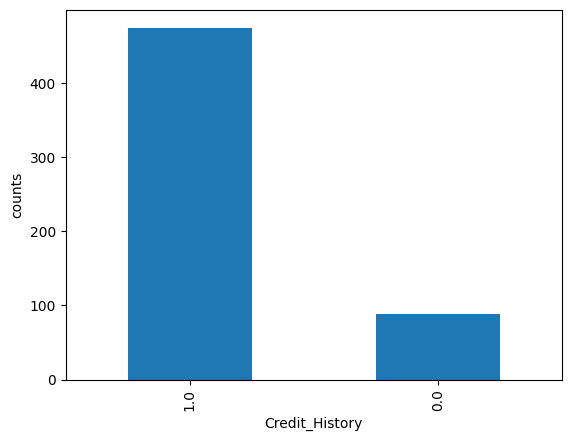

In [14]:
for i in numerical_data:
  loan[i].value_counts().plot(kind="bar")
  plt.xlabel(i)
  plt.ylabel("counts")
  plt.show()

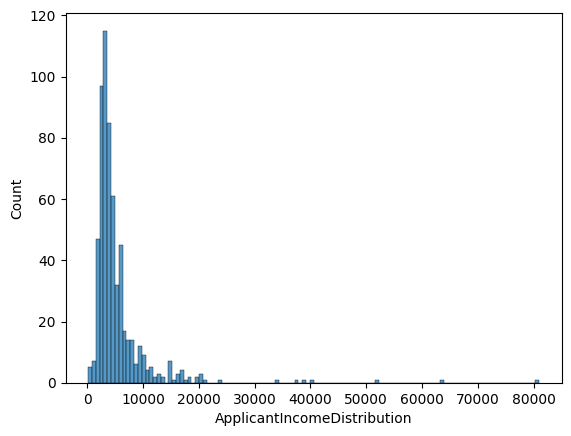

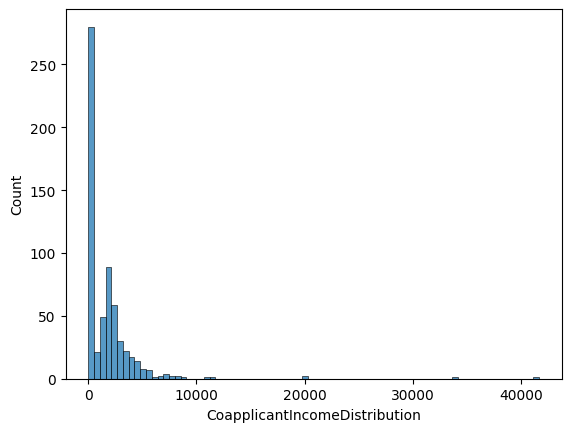

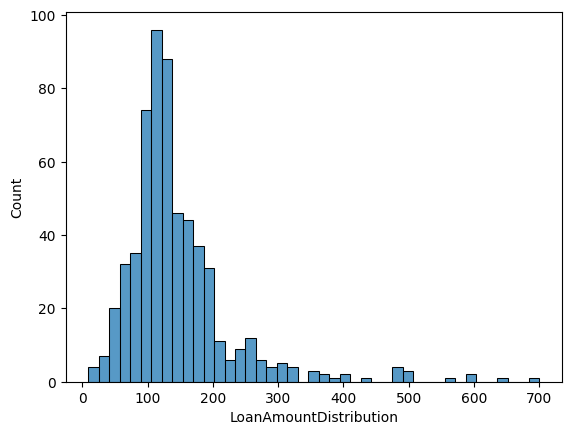

In [15]:

import seaborn as sns
for i in continuous_num_data:
  sns.histplot(loan[i])
  plt.xlabel(i+"Distribution")
  plt.show()

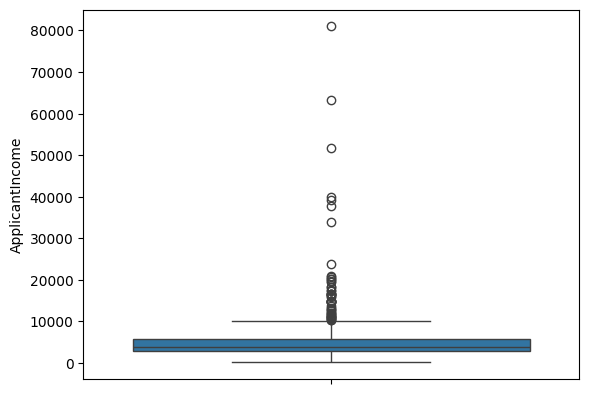

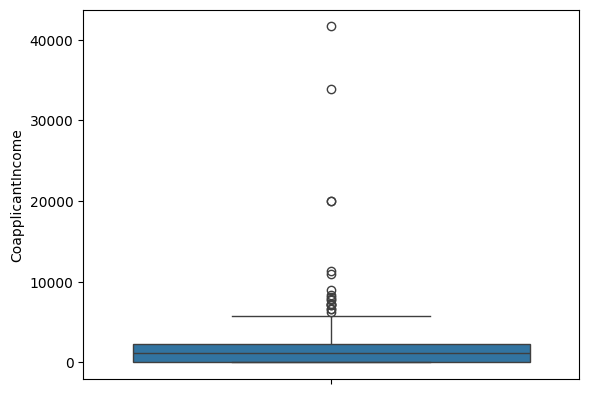

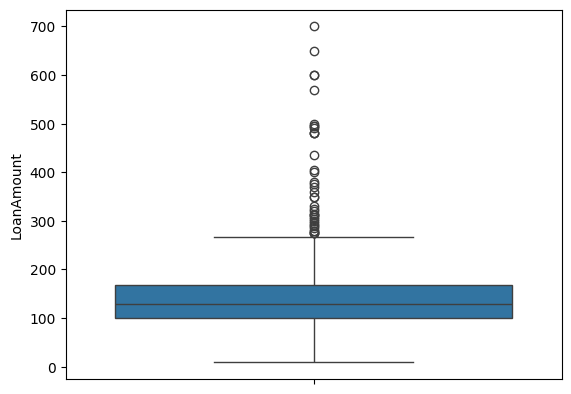

In [16]:
for i in continuous_num_data:
  sns.boxplot(data = loan,y=i)
  plt.show()

<Axes: >

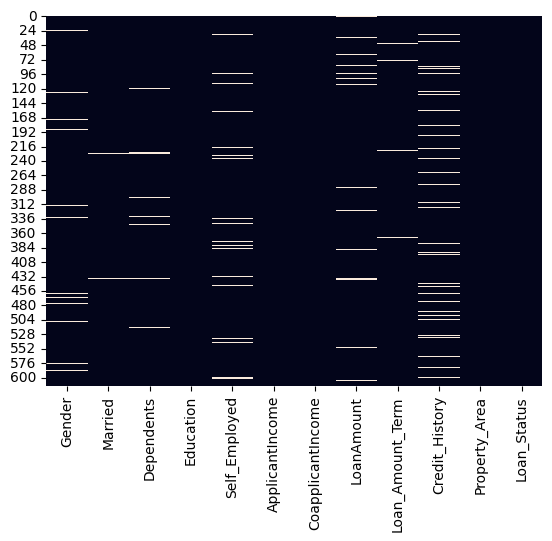

In [17]:
sns.heatmap(loan.isnull(),cbar=False)

In [18]:
for i in categorical_data+discrete_num_data:
     loan[i] = loan[i].fillna(loan[i].mode().iloc[0])

In [19]:
loan["LoanAmount"] =loan["LoanAmount"].fillna(loan["LoanAmount"].median)

<Axes: >

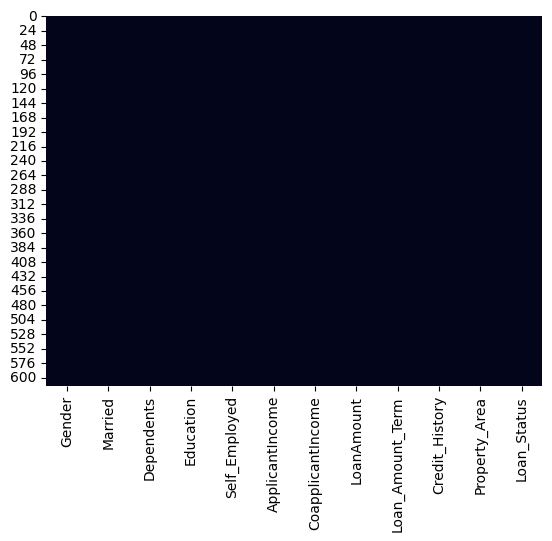

In [20]:
sns.heatmap(loan.isnull(),cbar=False)

In [21]:
loan.corr()

<ipython-input-21-4cc57022f0f6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan.corr()


,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,-0.059383,0.011134
Loan_Amount_Term,-0.046531,-0.059383,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.004705,1.000000


In [22]:
from sklearn import preprocessing
Le = preprocessing.LabelEncoder()
for i in categorical_data:
    loan[i] = Le.fit_transform(loan[i])



In [23]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,<bound method NDFrame._add_numeric_operations....,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [24]:
loan["TotalIncome"] = loan["ApplicantIncome"]+loan["CoapplicantIncome"]

In [25]:
loan.drop(["ApplicantIncome"],axis=1,inplace=True)


In [26]:
loan.drop(["CoapplicantIncome"],axis=1,inplace=True)


In [27]:
loan

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,<bound method NDFrame._add_numeric_operations....,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,141.0,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.0,360.0,1.0,0,1,2900.0
610,1,1,3,0,0,40.0,180.0,1.0,0,1,4106.0
611,1,1,1,0,0,253.0,360.0,1.0,2,1,8312.0
612,1,1,2,0,0,187.0,360.0,1.0,2,1,7583.0


In [28]:
continuous_num_data
continuous_num_data.remove("ApplicantIncome")


['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [38]:
continuous_num_data.remove("CoapplicantIncome")
continuous_num_data.append("TotalIncome")

In [40]:

for i in continuous_num_data + ["Loan_Amount_Term"]:
    loan[i] = pd.to_numeric(loan[i], errors='coerce').apply(lambda x: np.log(x) if x > 0 else 0)

In [41]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

X,y = loan.drop(columns = "Loan_Status"),loan["Loan_Status"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [42]:



model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [43]:
print("Accuracy of Logistic Regression Model is ",model.score(X_test,y_test)*100)


Accuracy of Logistic Regression Model is  79.80295566502463


In [44]:
score = cross_val_score(model, X, y, cv=5)
print("Cross validation is",np.mean(score)*100)

Cross validation is 80.9462881514061


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

random_classifier = RandomForestClassifier(n_estimators=200)
print('Validation Accuracy = ', format(cross_val_score(random_classifier,
                                                       X_train, y_train,
                                                       cv=5).mean(), '.2%'))

Validation Accuracy =  81.75%
